In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing all datasets
air_df = pd.read_csv('airline-safety.csv')
air_df_00_14 = air_df.drop(['incidents_85_99', 'fatalities_85_99', 'fatal_accidents_85_99'], axis = 1)
car_df = pd.read_excel('US_Vehicle_Fatalities.xlsx')
# importing only data of revenue from 2000 and beyond
cols = ['Year', 'NetMargin', 'NetProfit(mils)', 'OpProfit(mils)', 'OpRevenues(mils)']
revenue_df = pd.read_csv('Financial_Results__1947-Present_Full_Data_data.csv', names = cols, skiprows = 54)

In [3]:
# addition of + and - tags for graphing purposes later
revenue_df['Year'] = revenue_df['Year'].astype('object')
revenue_df['NetMarginPositive'] = revenue_df['NetMargin'] > 0

In [4]:
revenue_df

,Year,NetMargin,NetProfit(mils),OpProfit(mils),OpRevenues(mils),NetMarginPositive
0,2000,0.011263,3700,10700,328500,True
1,2001,-0.042276,-13000,-11800,307500,False
2,2002,-0.036928,-11300,-4800,306000,False
3,2003,-0.023306,-7500,-1500,321800,False
4,2004,-0.014784,-5600,3300,378800,False
5,2005,-0.009920,-4100,4400,413300,False
6,2006,0.010748,5000,15000,465200,True
7,2007,0.028835,14700,19900,509800,True
8,2008,-0.045830,-26100,-1100,569500,False
9,2009,-0.009668,-4600,1900,475800,False


In [5]:
air_df

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [6]:
# conversion of available seat metric to match FARS data
air_df_00_14['avail_seat_miles(billions)'] = round(air_df_00_14['avail_seat_km_per_week']*15*52*.6213712/1e9).astype(int)
air_df_00_14['fatalities_per_billion_seat_mi'] = air_df_00_14['fatalities_00_14']/air_df_00_14['avail_seat_miles(billions)']

In [7]:
# data for only the years 2000 - 2014
air_df_00_14

,airline,avail_seat_km_per_week,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,avail_seat_miles(billions),fatalities_per_billion_seat_mi
0,Aer Lingus,320906734,0,0,0,156,0.000000
1,Aeroflot*,1197672318,6,1,88,580,0.151724
2,Aerolineas Argentinas,385803648,1,0,0,187,0.000000
3,Aeromexico*,596871813,5,0,0,289,0.000000
4,Air Canada,1865253802,2,0,0,904,0.000000
5,Air France,3004002661,6,2,337,1456,0.231456
6,Air India*,869253552,4,1,158,421,0.375297
7,Air New Zealand*,710174817,5,1,7,344,0.020349
8,Alaska Airlines*,965346773,5,1,88,468,0.188034
9,Alitalia,698012498,4,0,0,338,0.000000


In [8]:
car_df['Fatality Rate per Billion VMT'] = car_df['Fatality Rate per 100 Million VMT']*10

In [9]:
car_df

,Year,Fatalities,Resident Population (Thousands),"Fatality Rate per 100,000 Population",Licensed Drivers (Thousands),"Fatality Rate per 100,000 Licensed Drivers",Registered Motor Vehicles (Thousands),"Fatality Rate per 100,000 Registered Vehicles",Vehicle Miles Traveled (Billions),Fatality Rate per 100 Million VMT,Fatal Crashes,Fatality Rate per Billion VMT
0,2000,41945,282162,14.87,190625,22.00,217028,19.33,2747,1.53,37526,15.3
1,2001,42196,284969,14.81,191276,22.06,221230,19.07,2796,1.51,37862,15.1
2,2002,43005,287625,14.95,194602,22.10,225685,19.06,2856,1.51,38491,15.1
3,2003,42884,290108,14.78,196166,21.86,230633,18.59,2890,1.48,38477,14.8
4,2004,42836,292805,14.63,198889,21.54,237949,18.00,2965,1.44,38444,14.4
5,2005,43510,295517,14.72,200549,21.70,245628,17.71,2989,1.46,39252,14.6
6,2006,42708,298380,14.31,202810,21.06,251415,16.99,3014,1.42,38648,14.2
7,2007,41259,301231,13.70,205742,20.05,257472,16.02,3031,1.36,37435,13.6
8,2008,37423,304094,12.31,208321,17.96,259360,14.43,2977,1.26,34172,12.6
9,2009,33883,306772,11.05,209618,16.16,258958,13.08,2957,1.15,30862,11.5


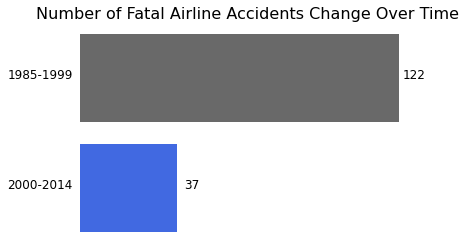

In [10]:
labels = ['2000-2014', '1985-1999']
values = air_df[['fatal_accidents_00_14', 'fatal_accidents_85_99']].sum()
xs = [0,1]
plt.barh(labels, values, color = ['royalblue','dimgray'])
plt.title('Number of Fatal Airline Accidents Change Over Time', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
for x,y in zip(labels, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-40,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y in zip(values, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(15,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

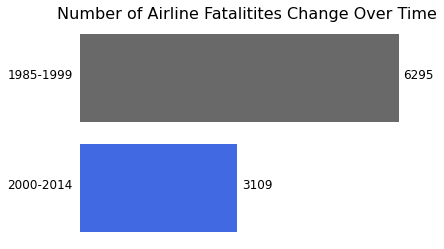

In [11]:
labels = ['2000-2014', '1985-1999']
values = air_df[['fatalities_00_14', 'fatalities_85_99']].sum()
plt.barh(labels, values, color = ['royalblue','dimgray'])
plt.title('Number of Airline Fatalitites Change Over Time', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
for x,y in zip(labels, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-40,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y in zip(values, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(20,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

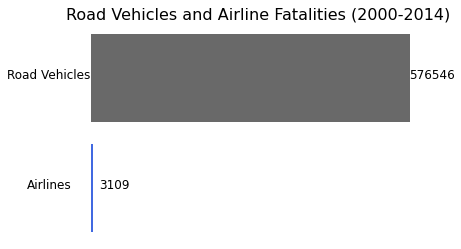

In [12]:
labels = ['Airlines', 'Road Vehicles']
values = [air_df_00_14['fatalities_00_14'].sum(), car_df['Fatalities'].sum()]
plt.barh(labels, values, color = ['royalblue','dimgray'])
plt.title('Road Vehicles and Airline Fatalities (2000-2014)', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
for x,y in zip(labels, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-42,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y in zip(values, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(22,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

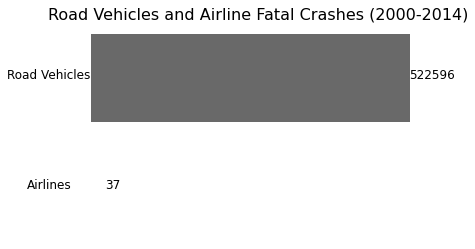

In [13]:
labels = ['Airlines', 'Road Vehicles']
values = [air_df_00_14['fatal_accidents_00_14'].sum(), car_df['Fatal Crashes'].sum()]
plt.barh(labels, values, color = ['royalblue','dimgray'])
plt.title('Road Vehicles and Airline Fatal Crashes (2000-2014)', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
for x,y in zip(labels, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-42,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y in zip(values, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(22,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

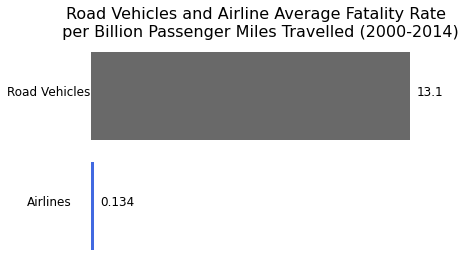

In [14]:
labels = ['Airlines', 'Road Vehicles']
values = [air_df_00_14['fatalities_per_billion_seat_mi'].mean(), car_df['Fatality Rate per Billion VMT'].mean()]
plt.barh(labels, values, color = ['royalblue','dimgray'])
plt.title('Road Vehicles and Airline Average Fatality Rate \n per Billion Passenger Miles Travelled (2000-2014)', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
for x,y in zip(labels, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-42,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.annotate(('{:.3f}').format(values[0]), # this is the text
            (values[0], 0), # this is the point to label
            textcoords="offset points", # how to position the text
            xytext=(23,0), # distance from text to points (x,y)
            ha='center',
            fontsize = 12) # horizontal alignment can be left, right or center
plt.annotate(('{}').format(values[1]), # this is the text
            (values[1], 1), # this is the point to label
            textcoords="offset points", # how to position the text
            xytext=(20,0), # distance from text to points (x,y)
            ha='center',
            fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

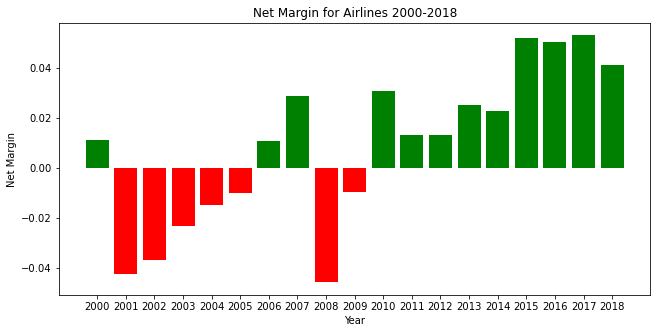

In [15]:
years = np.arange(2000, 2019, 1)
plt.figure(figsize = (10.6, 5))
plt.title('Net Margin for Airlines 2000-2018')
plt.ylabel('Net Margin')
plt.xlabel('Year')
plt.xticks(ticks = years, labels = years)
plt.bar(revenue_df['Year'], revenue_df['NetMargin'], color = revenue_df.NetMarginPositive.map({True: 'g', False: 'r'}))
plt.show()